#
<center> -------------------------------------------------------------------- </center>

# <center> Simulation Protocol </center>

<center> -------------------------------------------------------------------- </center>

# imports

In [1]:
import argparse, math, sys, os, time, glob
import numpy as np

from copy import deepcopy
from matplotlib import pyplot as plt

# OpenMM related
import simtk.openmm as mm
from simtk.openmm.app.modeller import Modeller
import simtk.openmm.app.forcefield as FF  # ForceField, PME, HBonds, AllBonds
from simtk.openmm.app.simulation import Simulation
import simtk.unit as unit
from simtk.openmm.app import PDBFile, PDBxFile
from pdbfixer.pdbfixer import PDBFixer

# needed to output in xtc and for discarding water in output
from mdtraj.reporters import DCDReporter, XTCReporter

# find longest dist in protein (named diagonal in GMX)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import linregress # assess slopes


# visualization
try:
    import nglview as nglv
    import mdtraj as md

    visualise = True
except:
    print("nglview not installed - cannot visualise trajectory")
    visualise = False

# Helper functions: 

# Test system 1PGA_clean.pdb

In [2]:
name_pdb = '1a92'
pdb_inp = "/home/trz846/protein_dynamics/data/pdbs_cleaned/{name_pdb}_clean.pdb"
pdb_inp = "/home/trz846/protein_dynamics/data/pdbs_cleaned/1bby_clean.pdb"
out_directory = "./"
rmsd = f'{name_pdb}/equil_rmsd_to_high_1a92.pdb'
traj = f'{name_pdb}/{name_pdb}_trajectory.xtc'
out_format = 'xtc'
print(name_pdb)

feat_viz = 'rmsd'

1a92


# Visualise 

In [3]:
all_at_once = False # takes a few mins
all_as_traj = True

if visualise is True:
    # load input pdb
    topology = md.load(pdb_inp, top=pdb_inp)
    view = nglv.show_mdtraj(topology, gui=True)
    view.clear_representations(component=0)
    view.add_representation(repr_type="rope", color="red", opacity=0.25, component=0)

    # load traj file
    if feat_viz == 'traj':
        out_name = f"{name_pdb}_trajectory.xtc"
        md_traj = md.load(traj, top=topology)
        align_atoms = md_traj.topology.select("name==CA")
        md_traj.superpose(topology, frame=0, atom_indices=align_atoms)
        if all_at_once:
            # load frames every 1 ns => 20 frames
            for frame_idx in range(100):
                if frame_idx % 5 == 0:
                    view.add_trajectory(md_traj[frame_idx])
        if all_as_traj:
            view.add_trajectory(md_traj)
    elif feat_viz == 'rmsd':
        rmsd_top = md.load(rmsd, top=rmsd)
        view.add_trajectory(rmsd_top)
        view.clear_representations(component=1)
        view.add_representation(repr_type="cartoon", color="blue", opacity=0.75, component=1)
        
                                        
                                        
view

/home/trz846/anaconda3/envs/MD/lib/python3.7/site-packages/mdtraj/core/trajectory.py:422: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')


NGLWidget()

In [4]:
!which python


/home/trz846/anaconda3/envs/MD/bin/python


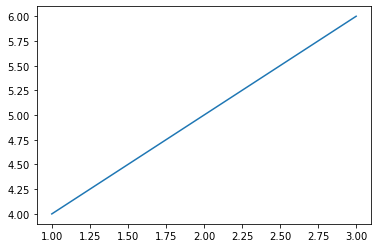

In [4]:
plt.plot([1,2,3],[4,5,6])